In [18]:
import pandas as pd
import matplotlib as mpl 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [5]:
mpl.rc('font', family = 'Malgun Gothic')

In [13]:
df = pd.read_csv('df_cluster_result_최종.csv')
df.head()

,위치,일시,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),Cluster
0,C,2016-01-01,466.916073,399.931800,111.610686,480.541403,191.603908,5.645956,-2.372171,6.5,1023.2,53.0,8.6,1
1,C,2016-01-02,462.048084,413.124592,184.873316,494.137144,398.508177,6.204298,-2.171323,9.2,1023.3,61.0,11.4,2
2,C,2016-01-03,481.714037,450.547333,1.794231,537.834034,0.933333,4.091682,-3.270690,4.6,1018.7,61.0,13.5,1
3,C,2016-01-04,445.589532,408.595023,130.497312,490.903517,164.789050,7.170962,-0.778970,6.6,1020.1,47.0,12.6,1
4,C,2016-01-05,300.211976,309.510464,176.789702,356.587164,348.965828,6.734510,-3.191605,6.1,1023.6,41.0,9.1,1


## 지역 예측

In [16]:
# 지역을 제외한 변수들 기반 지역 분류
# 일시 제외하고 분류 (get dummy 하면 변수 너무 많이 생김)

df = df.drop(['일시', 'Cluster'], axis = 1)

In [32]:
# 분류 사용 변수
X.columns

Index(['현재발전출력', '수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1', '외기온도2',
       '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)'],
      dtype='object')

In [20]:
label_encoder = LabelEncoder()
df['위치'] = label_encoder.fit_transform(df['위치'])

# 1. 타겟과 피쳐 설정
X = df.drop('위치', axis=1)  # 위치를 제외한 모든 변수를 독립 변수로 설정
y = df['위치']  # 위치를 종속 변수로 설정

# 2. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. 모델 선택 및 학습
model = RandomForestClassifier(random_state=42, max_depth = 3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_p_train = model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# LabelEncoder의 클래스 레이블을 문자열로 변환
target_names = label_encoder.classes_.astype(str)

# 5. 모델 평가
print(classification_report(y_train, y_p_train, target_names=target_names))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.9121004566210046
              precision    recall  f1-score   support

           B       0.99      0.94      0.96      1773
           C       0.94      0.84      0.88      1737
           D       0.92      0.93      0.92      1741
           E       0.86      0.98      0.92      1757

    accuracy                           0.92      7008
   macro avg       0.93      0.92      0.92      7008
weighted avg       0.93      0.92      0.92      7008

-----------------------------------------------------
              precision    recall  f1-score   support

           B       0.99      0.93      0.96       417
           C       0.93      0.82      0.87       453
           D       0.89      0.92      0.91       449
           E       0.86      0.98      0.91       433

    accuracy                           0.91      1752
   macro avg       0.92      0.91      0.91      1752
weighted avg       0.92      0.91      0.91      1752



In [22]:
label_encoder = LabelEncoder()
df['위치'] = label_encoder.fit_transform(df['위치'])

# 1. 타겟과 피쳐 설정
X = df.drop('위치', axis=1)  # 위치를 제외한 모든 변수를 독립 변수로 설정
y = df['위치']  # 위치를 종속 변수로 설정

# 2. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. 모델 선택 및 학습
model = SVC(kernel='linear', random_state=42)  # 선형 커널을 사용
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_p_train = model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# LabelEncoder의 클래스 레이블을 문자열로 변환
target_names = label_encoder.classes_.astype(str)

# 5. 모델 평가
print(classification_report(y_train, y_p_train, target_names=target_names))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.8915525114155252
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1773
           1       0.89      0.78      0.83      1737
           2       0.85      0.91      0.88      1741
           3       0.87      0.97      0.92      1757

    accuracy                           0.90      7008
   macro avg       0.90      0.90      0.90      7008
weighted avg       0.90      0.90      0.90      7008

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       417
           1       0.87      0.78      0.82       453
           2       0.84      0.89      0.86       449
           3       0.88      0.97      0.92       433

    accuracy                           0.89      1752
   macro avg       0.89      0.89      0.89      1752
weighted avg       0.89      0.89      0.89      1752



In [24]:
label_encoder = LabelEncoder()
df['위치'] = label_encoder.fit_transform(df['위치'])

# 1. 타겟과 피쳐 설정
X = df.drop('위치', axis=1)  # 위치를 제외한 모든 변수를 독립 변수로 설정
y = df['위치']  # 위치를 종속 변수로 설정

# 2. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. 모델 선택 및 학습
model = DecisionTreeClassifier(random_state=42, max_depth = 3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_p_train = model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# LabelEncoder의 클래스 레이블을 문자열로 변환
target_names = label_encoder.classes_.astype(str)

# 5. 모델 평가
print(classification_report(y_train, y_p_train, target_names=target_names))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.8818493150684932
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1773
           1       0.92      0.74      0.82      1737
           2       0.87      0.99      0.93      1741
           3       0.82      0.93      0.87      1757

    accuracy                           0.90      7008
   macro avg       0.90      0.89      0.89      7008
weighted avg       0.90      0.90      0.89      7008

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       417
           1       0.91      0.73      0.81       453
           2       0.85      1.00      0.92       449
           3       0.81      0.92      0.86       433

    accuracy                           0.88      1752
   macro avg       0.89      0.88      0.88      1752
weighted avg       0.89      0.88      0.88      1752



In [26]:
label_encoder = LabelEncoder()
df['위치'] = label_encoder.fit_transform(df['위치'])

# 1. 타겟과 피쳐 설정
X = df.drop('위치', axis=1)  # 위치를 제외한 모든 변수를 독립 변수로 설정
y = df['위치']  # 위치를 종속 변수로 설정

# 2. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. 모델 선택 및 학습
model = LogisticRegression(multi_class='ovr', random_state=42)  # 다중 클래스 문제를 'one-vs-rest' 전략으로 해결
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_p_train = model.predict(X_train)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# LabelEncoder의 클래스 레이블을 문자열로 변환
target_names = label_encoder.classes_.astype(str)

# 5. 모델 평가
print(classification_report(y_train, y_p_train, target_names=target_names))
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.8601598173515982
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1773
           1       0.81      0.73      0.77      1737
           2       0.82      0.82      0.82      1741
           3       0.85      0.97      0.90      1757

    accuracy                           0.87      7008
   macro avg       0.87      0.87      0.86      7008
weighted avg       0.87      0.87      0.86      7008

-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       417
           1       0.81      0.75      0.78       453
           2       0.80      0.79      0.80       449
           3       0.86      0.97      0.91       433

    accuracy                           0.86      1752
   macro avg       0.86      0.86      0.86      1752
weighted avg       0.86      0.86      0.86      1752



## 효율 지수 계산

In [35]:
df = pd.read_csv('df_cluster_result_최종.csv')
df.head()

,위치,일시,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),Cluster
0,C,2016-01-01,466.916073,399.931800,111.610686,480.541403,191.603908,5.645956,-2.372171,6.5,1023.2,53.0,8.6,1
1,C,2016-01-02,462.048084,413.124592,184.873316,494.137144,398.508177,6.204298,-2.171323,9.2,1023.3,61.0,11.4,2
2,C,2016-01-03,481.714037,450.547333,1.794231,537.834034,0.933333,4.091682,-3.270690,4.6,1018.7,61.0,13.5,1
3,C,2016-01-04,445.589532,408.595023,130.497312,490.903517,164.789050,7.170962,-0.778970,6.6,1020.1,47.0,12.6,1
4,C,2016-01-05,300.211976,309.510464,176.789702,356.587164,348.965828,6.734510,-3.191605,6.1,1023.6,41.0,9.1,1


In [37]:
df.loc[df['외기온도2'] >= 237.65504, '외기온도2'] = 23.870641

In [39]:
c0 = df[df['Cluster'] == 0]
c1 = df[df['Cluster'] == 1]
c2 = df[df['Cluster'] == 2]
c3 = df[df['Cluster'] == 3]

In [41]:
# 효율 지수 계산
# output / input

df['효율지수'] = df['현재발전출력'] / (df['수평일사량1'] + df['수평일사량2'] + df['경사일사량1'] + df['경사일사량2'])

In [43]:
df.head()

,위치,일시,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),Cluster,효율지수
0,C,2016-01-01,466.916073,399.931800,111.610686,480.541403,191.603908,5.645956,-2.372171,6.5,1023.2,53.0,8.6,1,0.394459
1,C,2016-01-02,462.048084,413.124592,184.873316,494.137144,398.508177,6.204298,-2.171323,9.2,1023.3,61.0,11.4,2,0.309966
2,C,2016-01-03,481.714037,450.547333,1.794231,537.834034,0.933333,4.091682,-3.270690,4.6,1018.7,61.0,13.5,1,0.486035
3,C,2016-01-04,445.589532,408.595023,130.497312,490.903517,164.789050,7.170962,-0.778970,6.6,1020.1,47.0,12.6,1,0.372945
4,C,2016-01-05,300.211976,309.510464,176.789702,356.587164,348.965828,6.734510,-3.191605,6.1,1023.6,41.0,9.1,1,0.251887


In [47]:
import seaborn as sns

## 클러스터 별 효율지수 시각화

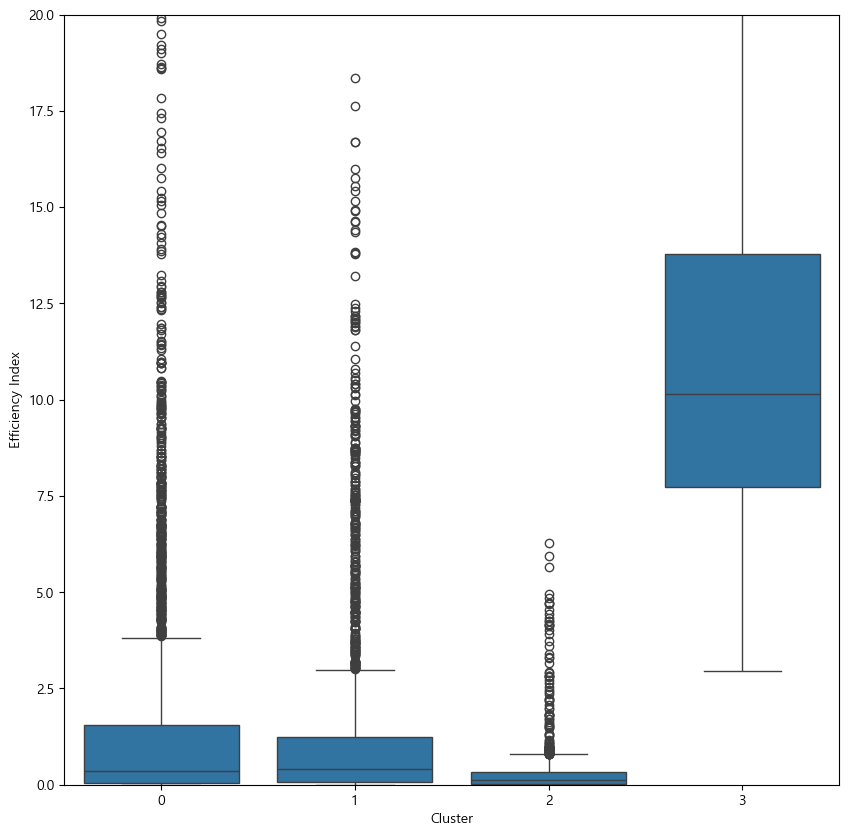

In [51]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Cluster', y='효율지수', data=df)
plt.xlabel('Cluster')
plt.ylabel('Efficiency Index')
plt.ylim([0, 20])
plt.show()

## 클러스터별 효율 지수
- C3 > C0 > C1 > C2 (클 수록 효율 좋음)

- C2: 효율 가장 안 좋은 클러스터
    - 지역 D가 가장 많이 존재, 41%
- C1: 효율 2번째 안 좋은 클러스터
    - 지역 E 가장 많이 존재, 36%
- C0: 효율 3번째 안 좋은 클러스터
    - 지역 E가 가장 많지만 모든 지역 골고루 분포
- C3: 가장 효율 좋은 클러스터
    - 지역 B 만 존재

In [199]:
c2['위치'].value_counts()

위치
D    808
C    698
E    377
B     82
Name: count, dtype: int64

In [205]:
808 / len(c2)

0.4111959287531807

In [201]:
c1['위치'].value_counts()

위치
E    1026
C     722
D     640
B     405
Name: count, dtype: int64

In [207]:
1026 / len(c1)

0.3673469387755102

In [209]:
c0['위치'].value_counts()

위치
E    787
C    770
D    742
B    573
Name: count, dtype: int64

In [55]:
c3['위치'].value_counts()

위치
B    1130
Name: count, dtype: int64

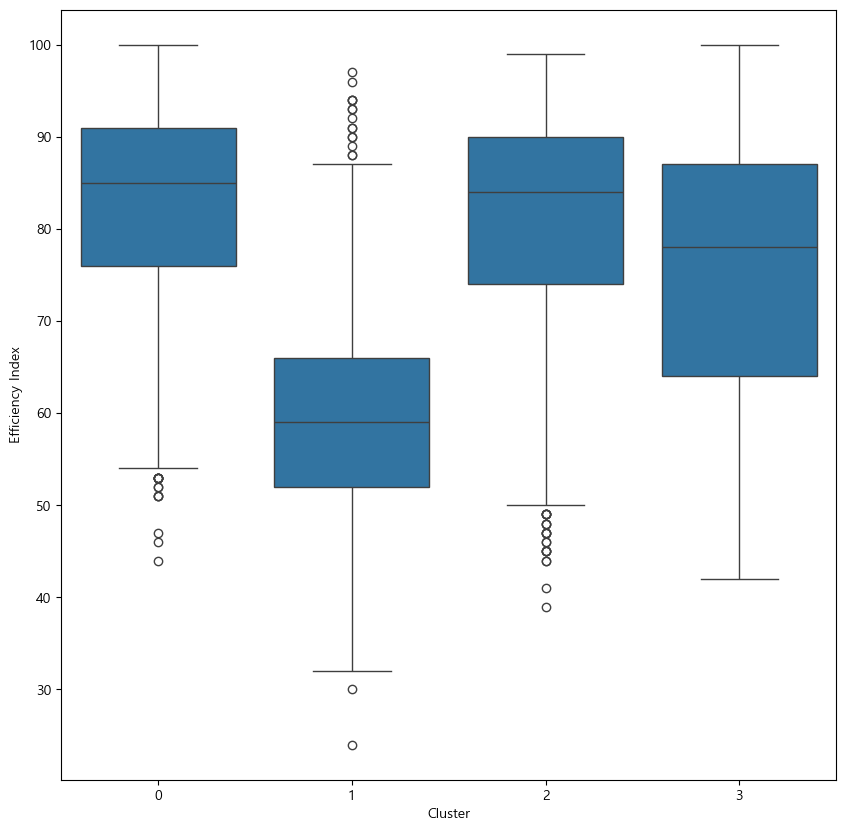

In [59]:
# 상대 습도와 클러스터
# 인사이트 X

plt.figure(figsize=(10, 10))
sns.boxplot(x='Cluster', y='평균 상대습도(%)', data=df)
plt.xlabel('Cluster')
plt.ylabel('Efficiency Index')
plt.show()